In [2]:

import numpy as np
import sympy as sp

class Formal:
    def __init__(self, expr):
        self.expr = str(expr)

    def __add__(self, other):
        other_expr = getattr(other, 'expr', str(other))
        if self.expr == "0":
            return Formal(other_expr)
        if other_expr == "0":
            return Formal(self.expr)
        return Formal(f"{self.expr} + {other_expr}")

    def __radd__(self, other):
        return self.__add__(other)

    def __mul__(self, other):
        other_expr = getattr(other, 'expr', str(other))
        if self.expr == "0" or other_expr == "0":
            return Formal("0")
        return Formal(f"{self.expr}*{other_expr}")

    def __rmul__(self, other):
        return self.__mul__(other)

    def __repr__(self):
        return self.expr

    def __eq__(self, other):
        return isinstance(other, Formal) and self.expr == other.expr
import numpy as np

Matrix = np.array([[0,0,2,0,0,0,0,0,1,0,0,0],
                   [1,0,0,0,0,0,0,0,0,1,0,0],
                   [0,0,0,2,0,0,0,0,0,0,1,0],
                   [0,2,0,0,1,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,0,0,0,0,1],
                   [0,0,0,0,0,0,0,1,1,0,0,0],
                   [0,0,1,1,0,0,0,0,0,0,0,0],
                   [0,1,0,0,0,1,0,0,0,0,0,0],
                   [0,0,0,0,1,0,2,0,0,0,0,0],
                   [2,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,2,0,1,0,0],
                   [0,0,0,0,0,1,0,0,0,0,1,0]], dtype=object)

K = Formal("K")
A = Formal("A")

Matrixsym = Matrix.copy()
Matrixsym[Matrixsym == 2] = A
Matrixsym[Matrixsym == 1] = K

Vector_in = np.array(range(1,13), dtype=object)
Vector_out = Matrixsym @ (Matrixsym @ Vector_in)

Vector_out

array([A*A*4 + K*11 + K*K*5 + A*7, K*A*3 + K*9 + K*A*1,
       A*A*2 + K*5 + K*A*8 + K*10, A*K*1 + K*10 + K*K*7 + K*12,
       K*K*3 + K*4 + K*K*6 + K*11, K*K*2 + K*6 + K*K*5 + A*7,
       K*A*4 + K*11 + K*A*2 + K*5, K*K*1 + K*10 + K*K*8 + K*9,
       K*K*7 + K*12 + A*K*3 + K*4, A*A*3 + K*9, A*K*2 + K*6 + K*A*1,
       K*K*8 + K*9 + K*A*8 + K*10], dtype=object)

In [9]:
class Formal:
    def __init__(self, op, args=None):
        self.op = op  # 'symbol', '+', '*', 'num'
        self.args = args or []  # list of Formal 或数值

    @classmethod
    def symbol(cls, name):
        return cls('symbol', [name])

    @classmethod
    def num(cls, value):
        return cls('num', [value])

    def __add__(self, other):
        if not isinstance(other, Formal):
            other = Formal.num(other)
        # 舍去 0
        if self.op == 'num' and self.args[0] == 0:
            return other
        if other.op == 'num' and other.args[0] == 0:
            return self
        return Formal('+', [self, other])

    __radd__ = __add__

    def __mul__(self, other):
        if not isinstance(other, Formal):
            other = Formal.num(other)
        # 0 处理
        if (self.op == 'num' and self.args[0] == 0) or (other.op == 'num' and other.args[0] == 0):
            return Formal.num(0)
        return Formal('*', [self, other])

    __rmul__ = __mul__

    def __repr__(self):
        if self.op == 'symbol':
            return str(self.args[0])
        elif self.op == 'num':
            return str(self.args[0])
        elif self.op in ('+', '*'):
            return '(' + f' {self.op} '.join(map(str, self.args)) + ')'
        else:
            return str(self.args)


import numpy as np

K = Formal.symbol("K")
A = Formal.symbol("A")

Matrix = np.array([[0,0,2,0,0,0,0,0,1,0,0,0],
                   [1,0,0,0,0,0,0,0,0,1,0,0],
                   [0,0,0,2,0,0,0,0,0,0,1,0],
                   [0,2,0,0,1,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,1,0,0,0,0,1],
                   [0,0,0,0,0,0,0,1,1,0,0,0],
                   [0,0,1,1,0,0,0,0,0,0,0,0],
                   [0,1,0,0,0,1,0,0,0,0,0,0],
                   [0,0,0,0,1,0,2,0,0,0,0,0],
                   [2,0,0,0,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,2,0,1,0,0],
                   [0,0,0,0,0,1,0,0,0,0,1,0]], dtype=object)

Matrixsym = Matrix.copy()
Matrixsym[Matrixsym==2] = A
Matrixsym[Matrixsym==1] = K

Vector = np.array(range(1,13), dtype=object)

for i in range(3):
    Vector = Matrixsym @ Vector

for x in Vector:
    print(x)


((A * ((A * ((A * 2) + (K * 5))) + (K * ((A * 8) + (K * 10))))) + (K * ((K * ((K * 7) + (K * 12))) + (A * ((K * 3) + (K * 4))))))
((K * ((A * ((A * 4) + (K * 11))) + (K * ((K * 5) + (A * 7))))) + (K * (A * ((A * 3) + (K * 9)))))
((A * ((A * ((K * 1) + (K * 10))) + (K * ((K * 7) + (K * 12))))) + (K * ((A * ((K * 2) + (K * 6))) + (K * (A * 1)))))
((A * ((K * ((A * 3) + (K * 9))) + (K * (A * 1)))) + (K * ((K * ((K * 3) + (K * 4))) + (K * ((K * 6) + (K * 11))))))
((K * ((K * ((A * 4) + (K * 11))) + (K * ((A * 2) + (K * 5))))) + (K * ((K * ((K * 8) + (K * 9))) + (K * ((A * 8) + (K * 10))))))
((K * ((K * ((K * 1) + (K * 10))) + (K * ((K * 8) + (K * 9))))) + (K * ((K * ((K * 7) + (K * 12))) + (A * ((K * 3) + (K * 4))))))
((K * ((A * ((A * 2) + (K * 5))) + (K * ((A * 8) + (K * 10))))) + (K * ((A * ((K * 1) + (K * 10))) + (K * ((K * 7) + (K * 12))))))
((K * ((K * ((A * 3) + (K * 9))) + (K * (A * 1)))) + (K * ((K * ((K * 2) + (K * 6))) + (K * ((K * 5) + (A * 7))))))
((K * ((K * ((K * 3) + (K * 4

In [20]:
import tkinter as tk

root = tk.Tk()
root.title("Color Grid")

matrix_size = 4       # 每个小方阵 4x4
layers = 9            # 一共 9 层
cols_per_layer = 12   # 每层 12 个小方阵

# ====== 创建带滚动条的 Canvas 容器 ======
canvas = tk.Canvas(root)
scrollbar_y = tk.Scrollbar(root, orient="vertical", command=canvas.yview)
scrollbar_x = tk.Scrollbar(root, orient="horizontal", command=canvas.xview)

canvas.configure(yscrollcommand=scrollbar_y.set, xscrollcommand=scrollbar_x.set)

scrollbar_y.pack(side="right", fill="y")
scrollbar_x.pack(side="bottom", fill="x")
canvas.pack(side="left", fill="both", expand=True)

# 在 Canvas 里放 Frame
frame = tk.Frame(canvas)
canvas.create_window((0, 0), window=frame, anchor="nw")

# ====== 保存颜色状态（默认白色） ======
grid_colors = [[[[["white"] * matrix_size for _ in range(matrix_size)]
                for _ in range(cols_per_layer)]
               for _ in range(layers)]]

def update_color(row, col, block, layer):
    current_color = grid_colors[0][layer][block][row][col]
    new_color = "gray" if current_color == "white" else "white"  # 白 ↔ 灰 切换
    grid_colors[0][layer][block][row][col] = new_color
    buttons[layer][block][row][col].config(bg=new_color)

buttons = []

for layer in range(layers):
    layer_buttons = []
    for block in range(cols_per_layer):
        # 每个小矩阵外框（红色边界）
        subframe = tk.Frame(frame, highlightbackground="red", highlightthickness=2, padx=1, pady=1)
        subframe.grid(
            row=layer * (matrix_size + 2),   # 层与层之间多留一行
            column=block,
            padx=3, pady=3
        )

        block_buttons = []
        for row in range(matrix_size):
            row_buttons = []
            for col in range(matrix_size):
                button = tk.Button(subframe, width=2, height=1, bg="white",   # 默认白色
                                   command=lambda r=row, c=col, b=block, l=layer: update_color(r, c, b, l))
                button.grid(row=row, column=col, padx=1, pady=1)
                row_buttons.append(button)
            block_buttons.append(row_buttons)
        layer_buttons.append(block_buttons)

        # 在每个小矩阵下面加编号
        label = tk.Label(frame, text=str(block + 1), font=("Arial", 8))
        label.grid(row=layer * (matrix_size + 2) + 1, column=block)

    buttons.append(layer_buttons)

# ====== 自动调整滚动区域 ======
def update_scrollregion(event):
    canvas.configure(scrollregion=canvas.bbox("all"))

frame.bind("<Configure>", update_scrollregion)

root.mainloop()


In [9]:
#!/usr/bin/env python3
"""
rebound_search.py

完整实现：
- 12x12 operation matrix (values 0/1/2) 表示一轮中 12 个大块的组合关系
- ReboundModel: SB -> SR -> MC -> XOR (按你给定的规则)
- FullCipherModel: 用 op_matrix 把一轮映射到下一轮
- GA: 在给定 seed（块 5,6,9,10,11,12 的左上角为灰）下搜索初始 12x16 mask，
      目标最小化最终灰色数并满足 SP - Prob > 0（否则重罚）

运行:
    python rebound_search.py

依赖: numpy
"""
from typing import List, Tuple, Iterable
import numpy as np
import random
from copy import deepcopy

# ---------------------------
# Configurable hyperparams
# ---------------------------
SEED_GLOBAL = 2025           # 控制整体随机性（GA 和传播使用相同种子以保证可复现）
ROUNDS = 3                   # 传播轮数
POP_SIZE = 160               # GA 种群大小
GENERATIONS = 200            # GA 代数
MUTPB = 0.02                 # 突变概率（每个 bit）
ELITE = 6                    # 精英保留数量
INITIAL_DENSITY = 0.08       # 初始化随机个体激活密度
BIG_PENALTY = 10000          # 违反 SP-Prob 约束的惩罚
P_GRAY_GRAY_TO_WHITE = 0.5   # gray ⊕ gray -> white 的概率
RNG_SEED_EVAL = 12345        # 传播时的内部随机种子（用于确定 MC、gray-gray 结果）

# ---------------------------
# Helper mapping for 4x4 indices
# ---------------------------
def idx_to_rowcol(idx: int) -> Tuple[int,int]:
    return divmod(idx, 4)  # (row, col)

def col_indices(col: int) -> List[int]:
    return [col + 4*r for r in range(4)]

# ---------------------------
# ReboundModel: SB, SR, MC, XOR primitives
# ---------------------------
class ReboundModel:
    def __init__(self, p_gray_gray_to_white: float = P_GRAY_GRAY_TO_WHITE):
        self.p = p_gray_gray_to_white

    def sb(self, blocks: np.ndarray) -> Tuple[np.ndarray, int]:
        """
        SB: 不改变 0/1 掩码；每个灰色 nibble 在 SB 时 SP += 1
        blocks: shape (n_blocks, 16)
        返回 (blocks_after_sb, delta_SP)
        """
        return blocks.copy(), int(blocks.sum())

    def sr(self, blocks: np.ndarray) -> np.ndarray:
        """
        SR: 对每个 4x4 block 做行移位（行 r 左移 r）
        blocks shape: (n_blocks, 16)
        """
        out = np.zeros_like(blocks)
        for b in range(blocks.shape[0]):
            blk = blocks[b].reshape(4,4)
            newblk = np.zeros_like(blk)
            for r in range(4):
                newblk[r,:] = np.roll(blk[r,:], -r)
            out[b] = newblk.reshape(16)
        return out

    def mc(self, blocks: np.ndarray, rng: random.Random) -> Tuple[np.ndarray, int, int]:
        """
        MC: 按列处理。对每列 i = 原有灰色数。
             若 i>0, 随机采样 j in [5-i, 4]，从该列 4 个位置随机选 j 个置灰。
             更新: delta_SP += 8*j, delta_Prob += 8*(4-j)
        返回 (after_mc, delta_sp, delta_prob)
        """
        out = np.zeros_like(blocks)
        delta_sp = 0
        delta_prob = 0
        for b in range(blocks.shape[0]):
            blk = blocks[b].reshape(4,4).copy()
            newblk = np.zeros_like(blk)
            for c in range(4):
                col = blk[:, c]
                i = int(col.sum())
                if i > 0:
                    low = max(1, 5 - i)
                    high = 4
                    j = rng.randint(low, high)
                    positions = rng.sample(range(4), j)
                    for rpos in positions:
                        newblk[rpos, c] = 1
                    delta_sp += 8 * j
                    delta_prob += 8 * (4 - j)
                else:
                    newblk[:, c] = 0
            out[b] = newblk.reshape(16)
        return out, delta_sp, delta_prob

    def xor_combine_two(self, a: np.ndarray, b: np.ndarray, rng: random.Random) -> Tuple[np.ndarray, int]:
        """
        按 nibble 做 a ⊕ b，遵循:
          0⊕0 -> 0
          1⊕0 or 0⊕1 -> 1
          1⊕1 -> 随机变 0 或 1（若变 0, delta_prob += 8）
        返回 (accum, delta_prob)
        a,b: 1D arrays length 16
        """
        accum = a.copy()
        delta_prob = 0
        for i in range(16):
            if accum[i] == 0 and b[i] == 0:
                accum[i] = 0
            elif accum[i] == 1 and b[i] == 0:
                accum[i] = 1
            elif accum[i] == 0 and b[i] == 1:
                accum[i] = 1
            else:  # both 1
                if rng.random() < self.p:
                    accum[i] = 0
                    delta_prob += 8
                else:
                    accum[i] = 1
        return accum, delta_prob

    def xor_phase(self, blocks: np.ndarray, xor_pairs: Iterable[Tuple[int,int]], rng: random.Random) -> Tuple[np.ndarray, int]:
        """
        xor_pairs: iterator of (dst, src) meaning dst = dst ⊕ src (in-order)
        blocks: shape (12,16)
        返回 (blocks_after_xor, delta_prob)
        注意：这里按序修改 dst，因此顺序会影响结果（与你给定的 op_matrix 中对行的处理一致）
        """
        out = blocks.copy()
        delta_prob = 0
        for dst, src in xor_pairs:
            a = out[dst].copy()
            b = out[src].copy()
            # combine into dst
            for i in range(16):
                if a[i] == 0 and b[i] == 0:
                    out[dst, i] = 0
                elif a[i] == 1 and b[i] == 0:
                    out[dst, i] = 1
                elif a[i] == 0 and b[i] == 1:
                    out[dst, i] = 1
                else:  # both 1
                    if rng.random() < self.p:
                        out[dst, i] = 0
                        delta_prob += 8
                    else:
                        out[dst, i] = 1
        return out, delta_prob

    def run_block_operation(self, blk_mask: np.ndarray, rng: random.Random) -> Tuple[np.ndarray, int, int]:
        """
        对单个 block 的 (SB -> SR -> MC) 组合操作
        blk_mask: shape (1,16) or (16,)
        返回 after_mc (shape (1,16)), delta_SP, delta_Prob
        """
        if blk_mask.ndim == 1:
            blk_mask = blk_mask.reshape(1,16)
        after_sb, dsp = self.sb(blk_mask)
        after_sr = self.sr(after_sb)
        after_mc, dsp_mc, dprob_mc = self.mc(after_sr, rng)
        return after_mc, dsp + dsp_mc, dprob_mc

# ---------------------------
# Operation matrix (12x12) - 你的输入规则
# ---------------------------
op_matrix = np.array([
    [0,0,2,0,0,0,0,0,1,0,0,0],
    [1,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,2,0,0,0,0,0,0,1,0],
    [0,2,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,1,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,2,0,0,0,0,0],
    [2,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,2,0,1,0,0],
    [0,0,0,0,0,1,0,0,0,0,1,0]
], dtype=int)

# ---------------------------
# FullCipherModel: 应用 op_matrix 构造一轮映射
# ---------------------------
class FullCipherModel:
    def __init__(self, op_matrix: np.ndarray, rebound_model: ReboundModel, rounds: int = ROUNDS, rng_seed: int = RNG_SEED_EVAL):
        assert op_matrix.shape == (12,12)
        self.M = op_matrix.copy()
        self.model = rebound_model
        self.rounds = rounds
        self.rng_seed = rng_seed

    def apply_round(self, blocks: np.ndarray, rng: random.Random) -> Tuple[np.ndarray, int, int]:
        """
        blocks: (12,16)
        rng: random.Random instance
        返回 new_blocks, delta_SP, delta_Prob
        """
        assert blocks.shape == (12,16)
        contributions = [[] for _ in range(12)]
        delta_SP = 0
        delta_Prob = 0
        processed_cache = {}

        # 先处理 op==2 的来源块（SB->SR->MC）
        # 对于每个输出行 out_idx, 若该行在 src_idx 有 op==2，则把处理后的 src 推入 contributions[out_idx]
        for out_idx in range(12):
            for src_idx in range(12):
                op = int(self.M[out_idx, src_idx])
                if op == 0:
                    continue
                if op == 2:
                    if src_idx not in processed_cache:
                        src_blk = blocks[src_idx].copy()
                        processed_mask, dsp, dprob = self.model.run_block_operation(src_blk, rng)
                        # processed_mask: shape (1,16)
                        processed_cache[src_idx] = processed_mask[0]
                        delta_SP += dsp
                        delta_Prob += dprob
                    contributions[out_idx].append(processed_cache[src_idx])
                elif op == 1:
                    contributions[out_idx].append(blocks[src_idx].copy())
                else:
                    raise ValueError("Unknown op value in op_matrix")

        # 将 contributions 按行合并（XOR 语义，灰灰情况可能引入 delta_Prob）
        new_blocks = np.zeros_like(blocks)
        for out_idx in range(12):
            if not contributions[out_idx]:
                new_blocks[out_idx] = np.zeros(16, dtype=int)
                continue
            accum = contributions[out_idx][0].copy()
            # 若有多个 contribution，按顺序 XOR 进去（顺序由 op_matrix 行的 src_idx 遍历顺序决定）
            for contrib in contributions[out_idx][1:]:
                accum, dprob = self.model.xor_combine_two(accum, contrib, rng)
                delta_Prob += dprob
            new_blocks[out_idx] = accum
        return new_blocks, delta_SP, delta_Prob

    def evaluate(self, init_blocks: np.ndarray, rng_seed_override: int = None) -> dict:
        """
        从 init_blocks 运行 self.rounds 轮，返回字典:
        {
            'SP': int, 'Prob': int,
            'per_round': [ {round, delta_SP, delta_Prob, SP_sofar, Prob_sofar, SP_minus_Prob, total_gray}, ... ],
            'final_blocks': ndarray (12,16)
        }
        """
        print("DEBUG: evaluate called")
        rng_seed = self.rng_seed if rng_seed_override is None else rng_seed_override
        rng = random.Random(rng_seed)
        current = init_blocks.copy()
        SP = 0
        Prob = 0
        per_round = []
        masks_per_round = [current.copy()]  # 初始 mask
        for r in range(self.rounds):
            current, dSP, dProb = self.apply_round(current, rng)
            SP += dSP
            Prob += dProb
            masks_per_round.append(current.copy())
            per_round.append({
                "round": r+1,
                "delta_SP": dSP,
                "delta_Prob": dProb,
                "SP_sofar": SP,
                "Prob_sofar": Prob,
                "SP_minus_Prob": SP - Prob,
                "total_gray": int(current.sum())
            })
        return {"SP": SP, "Prob": Prob, "per_round": per_round, "final_blocks": current, "masks_per_round": masks_per_round}

# ---------------------------
# GA: 搜索初始 mask
# ---------------------------
def seed_init_mask() -> np.ndarray:
    """
    你的初始设定：块编号从 1 开始。
    初始状态中，第 5,6,9,10,11,12 块的左上角第一个小格子为灰 (index 0)；其余为 0。
    返回 shape (12,16) 的 0/1 mask
    """
    mask = np.zeros((12,16), dtype=int)
    seeded_blocks = [5,6,9,10,11,12]
    for b in seeded_blocks:
        mask[b-1, 0] = 1
    return mask

def fitness_of_mask(mask: np.ndarray, cipher_model: FullCipherModel) -> float:
    """
    评估函数：运行 cipher_model.evaluate 对 mask 做传播。
    若 (SP - Prob) <= 0 则返回 BIG_PENALTY + 缺额；否则返回 final_gray。
    目标是最小化 fitness。
    """
    res = cipher_model.evaluate(mask, rng_seed_override=RNG_SEED_EVAL)
    final_gray = int(res["final_blocks"].sum())
    SP = res["SP"]
    Prob = res["Prob"]
    if (SP - Prob) <= 0:
        return BIG_PENALTY + (0 - (SP - Prob))
    return final_gray

def tournament_select(pop: List[np.ndarray], fits: List[float], k: int = 3) -> np.ndarray:
    selected = random.sample(range(len(pop)), k)
    best = min(selected, key=lambda idx: fits[idx])
    return deepcopy(pop[best])

def ga_search(cipher_model: FullCipherModel,
              pop_size: int = POP_SIZE,
              generations: int = GENERATIONS,
              mutpb: float = MUTPB,
              elite: int = ELITE,
              initial_density: float = INITIAL_DENSITY) -> Tuple[np.ndarray, float, List[float]]:
    random.seed(SEED_GLOBAL)
    np.random.seed(SEED_GLOBAL)
    base_seeded = seed_init_mask()

    def random_individual():
        ind = (np.random.rand(12,16) < initial_density).astype(int)
        ind = np.maximum(ind, base_seeded)  # 保持 seed
        return ind

    pop = [random_individual() for _ in range(pop_size)]
    fits = [fitness_of_mask(ind, cipher_model) for ind in pop]
    best_history = []
    for gen in range(generations):
        # 排序
        idx_sorted = sorted(range(len(pop)), key=lambda i: fits[i])
        newpop = [deepcopy(pop[i]) for i in idx_sorted[:elite]]
        # 交叉/变异
        while len(newpop) < pop_size:
            a = tournament_select(pop, fits)
            b = tournament_select(pop, fits)
            flat_a = a.flatten()
            flat_b = b.flatten()
            point = random.randint(1, flat_a.size - 1)
            c1_flat = np.concatenate([flat_a[:point], flat_b[point:]])
            c2_flat = np.concatenate([flat_b[:point], flat_a[point:]])
            child1 = c1_flat.reshape(12,16).astype(int)
            child2 = c2_flat.reshape(12,16).astype(int)
            # mutate (不允许翻转 seeded bits)
            for child in (child1, child2):
                for i in range(12):
                    for j in range(16):
                        if base_seeded[i,j] == 1:
                            continue
                        if random.random() < mutpb:
                            child[i,j] = 1 - child[i,j]
                # 保证 seed 仍然为 1
                child = np.maximum(child, base_seeded)
                newpop.append(child)
                if len(newpop) >= pop_size:
                    break
        pop = newpop[:pop_size]
        fits = [fitness_of_mask(ind, cipher_model) for ind in pop]
        best_fit = min(fits)
        best_history.append(best_fit)
        if gen % 20 == 0 or gen == generations-1:
            print(f"Gen {gen:4d}: best fitness = {best_fit}")
    idx_best = int(np.argmin(fits))
    return pop[idx_best], fits[idx_best], best_history

# ---------------------------
# Main: 评估基线并运行 GA
# ---------------------------
def random_init_blocks(density=0.1):
    return (np.random.rand(12,16) < density).astype(int)

def main():
    print("Rebound search start. Params:")
    print(f"  SEED_GLOBAL={SEED_GLOBAL}, ROUNDS={ROUNDS}, POP_SIZE={POP_SIZE}, GENERATIONS={GENERATIONS}")
    rebound = ReboundModel(p_gray_gray_to_white=P_GRAY_GRAY_TO_WHITE)
    cipher = FullCipherModel(op_matrix, rebound, rounds=ROUNDS, rng_seed=RNG_SEED_EVAL)

    # Baseline：只有你指定 seeds 被激活
    init_seed = seed_init_mask()
    res_seed = cipher.evaluate(init_seed, rng_seed_override=RNG_SEED_EVAL)
    print("\n=== Baseline evaluation (only seeded bits active) ===")
    for r in res_seed["per_round"]:
        print(r)
    print("Final gray count:", int(res_seed["final_blocks"].sum()), "SP-Prob:", res_seed["SP"]-res_seed["Prob"])

    # 运行 GA 搜索更优的初始 mask
    print("\nStarting GA search...")
    best_mask, best_fit, history = ga_search(cipher,
                                            pop_size=POP_SIZE,
                                            generations=GENERATIONS,
                                            mutpb=MUTPB,
                                            elite=ELITE,
                                            initial_density=INITIAL_DENSITY)
    print("\n=== GA result ===")
    print("Best fitness:", best_fit)
    print("Best initial mask (12 blocks x 16 nibbles):")
    for bi in range(12):
        print("Block", bi+1, ":", best_mask[bi].tolist())
    print()
    best_eval = cipher.evaluate(best_mask, rng_seed_override=RNG_SEED_EVAL)
    print("Per-round stats for best mask:")
    for r in best_eval["per_round"]:
        print(r)
    print("Final gray count:", int(best_eval["final_blocks"].sum()), "SP-Prob:", best_eval["SP"]-best_eval["Prob"])



In [6]:
rebound = ReboundModel(p_gray_gray_to_white=P_GRAY_GRAY_TO_WHITE)
cipher = FullCipherModel(op_matrix, rebound, rounds=ROUNDS, rng_seed=RNG_SEED_EVAL)

if __name__ == "__main__":
    main()


Rebound search start. Params:
  SEED_GLOBAL=2025, ROUNDS=3, POP_SIZE=160, GENERATIONS=200

=== Baseline evaluation (only seeded bits active) ===
{'round': 1, 'delta_SP': 0, 'delta_Prob': 8, 'SP_sofar': 0, 'Prob_sofar': 8, 'SP_minus_Prob': -8, 'total_gray': 9}
{'round': 2, 'delta_SP': 165, 'delta_Prob': 24, 'SP_sofar': 165, 'Prob_sofar': 32, 'SP_minus_Prob': 133, 'total_gray': 23}
{'round': 3, 'delta_SP': 396, 'delta_Prob': 48, 'SP_sofar': 561, 'Prob_sofar': 80, 'SP_minus_Prob': 481, 'total_gray': 62}
Final gray count: 62 SP-Prob: 481

Starting GA search...
Gen    0: best fitness = 90
Gen   20: best fitness = 90
Gen   40: best fitness = 84
Gen   60: best fitness = 84
Gen   80: best fitness = 84
Gen  100: best fitness = 82
Gen  120: best fitness = 82
Gen  140: best fitness = 78
Gen  160: best fitness = 71
Gen  180: best fitness = 71
Gen  199: best fitness = 71

=== GA result ===
Best fitness: 71
Best initial mask (12 blocks x 16 nibbles):
Block 1 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

DEBUG: evaluate called
dict_keys(['SP', 'Prob', 'per_round', 'final_blocks', 'masks_per_round'])


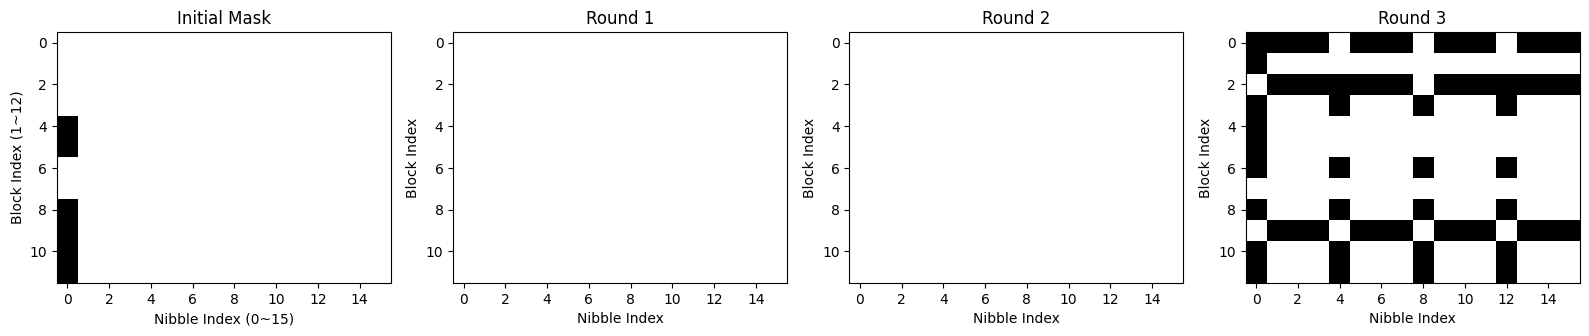

In [13]:
rebound = ReboundModel(p_gray_gray_to_white=0.5)
cipher = FullCipherModel(op_matrix, rebound, rounds=3, rng_seed=12345)
best_mask = seed_init_mask()
best_eval = cipher.evaluate(best_mask)
print(best_eval.keys())  # 应该看到 'masks_per_round'

visualize_rebound_path(best_eval, best_mask)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_rebound_path(best_eval, best_mask):
    """
    可视化 Rebound 差分路径：
    - 每轮一个 12x16 mask heatmap
    - 灰色表示灰色(nibble=1)，白色表示白色(nibble=0)
    """
    rounds = len(best_eval["per_round"])
    fig, axes = plt.subplots(1, rounds+1, figsize=(4*(rounds+1), 6))

    # 初始 mask
    im = axes[0].imshow(best_mask, cmap='Greys', vmin=0, vmax=1)
    axes[0].set_title("Initial Mask")
    axes[0].set_xlabel("Nibble Index (0~15)")
    axes[0].set_ylabel("Block Index (1~12)")

    # 每轮状态
    for r, ax in zip(range(rounds), axes[1:]):
        round_mask = best_eval["final_blocks"] if r == rounds-1 else None
        # 为每轮生成 mask，可以按 best_eval 中 per_round 记录生成
        # 这里我们直接使用最终状态展示
        if round_mask is None:
            # 没有存储每轮 mask，先用全零占位
            mask = np.zeros((12,16))
        else:
            mask = round_mask
        im = ax.imshow(mask, cmap='Greys', vmin=0, vmax=1)
        ax.set_title(f"Round {r+1}")
        ax.set_xlabel("Nibble Index")
        ax.set_ylabel("Block Index")
    
    plt.tight_layout()
    plt.show()

# 假设你已经运行 GA 得到 best_eval
# visualize_rebound_path(best_eval, best_mask)
visualize_rebound_path(best_eval["masks_per_round"])


TypeError: visualize_rebound_path() missing 1 required positional argument: 'best_mask'

In [23]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/8.1 MB 2.2 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/8.1 MB 1.7 MB/s eta 0:00:05
   ------ --------------------------------- 1.3/8.1 MB 1.6 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/8.1 MB 1.7 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.1 MB 1.6 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.1 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.6 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.6 MB/s eta 0:00:04
   ---------------- ----------------------- 3.4/8.1 MB 1.6 MB/s eta 0:00:04
   ------------------- -------------------- 3.9/8.1 MB 1.6 MB/s eta 0:00:03
   -------------------- --